## Updated Dataset: Ferguson et al. 2015

Data set of CA1 pyramidal cell recordings using an intact whole hippocampus preparation, including recordings of rebound firing.  

Source of data: https://www.zenodo.org/record/17794#.W5j7lBQnYYM

In [1]:
#https://pypi.org/project/pyabf/
import pyabf
import uuid

# random UUID for globally unique tag
unique_identifier = uuid.uuid4()

all_files = ['PYR1.abf','PYR2.abf','PYR3.abf','PYR4.abf','PYR5_rebound.abf']

for f in all_files:
    abf = pyabf.ABF(f) # read one data set

    print("--- Loaded file: %s"%abf)

    abf.setSweep(1) # sweeps start at 0

    print('Times info (%i points): %s'%(len(abf.sweepX),abf.sweepX)) # sweep times (seconds)
    print('Current info (%i points): %s'%(len(abf.sweepY),abf.sweepY)) # sweep data (ADC)



--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 1.03 minutes, recorded with protocol "cc10pA1s".
Times info (20000 points): [0.     0.0001 0.0002 ... 1.9997 1.9998 1.9999]
Current info (20000 points): [-23.4985 -25.0244  -4.5776 ... -10.0708 -15.2588 -10.0708]
--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 13 sweeps, having no tags, with a total length of 0.47 minutes, recorded with protocol "cc25pA1s".
Times info (20000 points): [0.     0.0001 0.0002 ... 1.9997 1.9998 1.9999]
Current info (20000 points): [-86.3647 -68.9697 -82.0923 ... -85.144  -81.7871 -75.9888]
--- Loaded file: ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 34 sweeps, having no tags, with a total length of 1.17 minutes, recorded with protocol "cc10pA1s".
Times info (20000 points): [0.     0.0001 0.0002 ... 1.9997 1.9998 1.9999]
Current i

## Overview of data

--- Loaded file (PYR1.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 1.03 minutes, recorded with protocol "cc10pA1s".


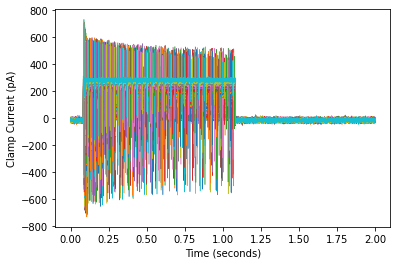

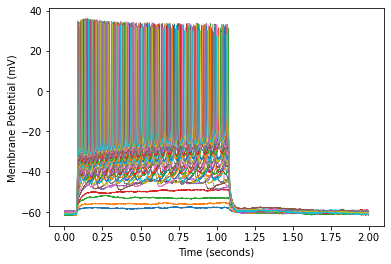

--- Loaded file (PYR2.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 13 sweeps, having no tags, with a total length of 0.47 minutes, recorded with protocol "cc25pA1s".


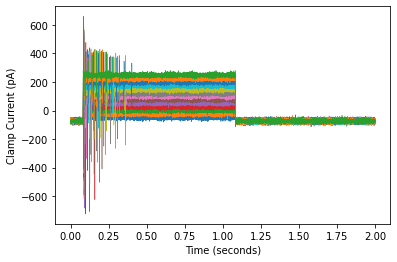

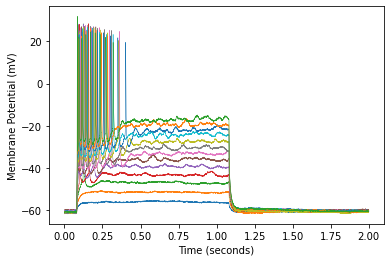

--- Loaded file (PYR3.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 34 sweeps, having no tags, with a total length of 1.17 minutes, recorded with protocol "cc10pA1s".


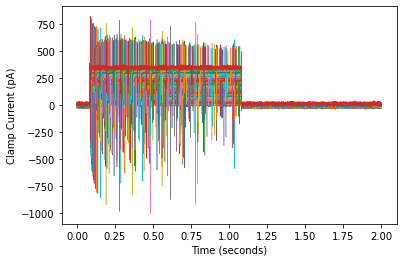

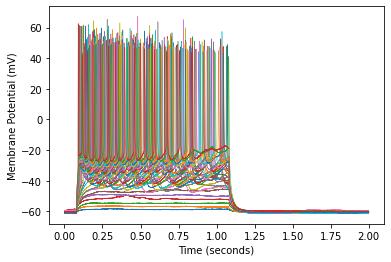

--- Loaded file (PYR4.abf): ABF (version 1.8.3.0) with 2 channels (pA, mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 1.03 minutes, recorded with protocol "cc10pA1s".


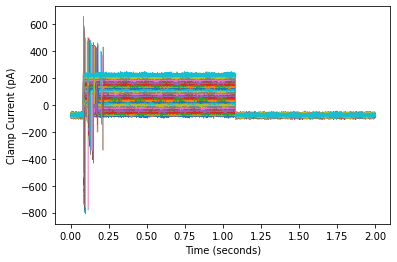

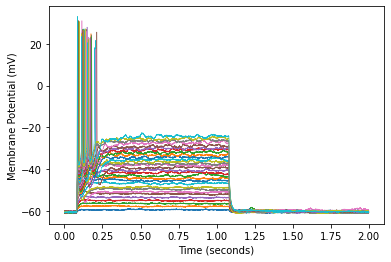

--- Loaded file (PYR5_rebound.abf): ABF (version 1.8.3.0) with 2 channels (nA, mV), sampled at 10.0 kHz, containing 10 sweeps, having no tags, with a total length of 0.37 minutes, recorded with protocol "cc-25pA1s".


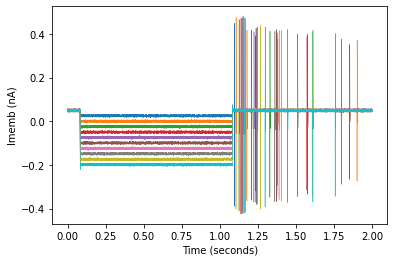

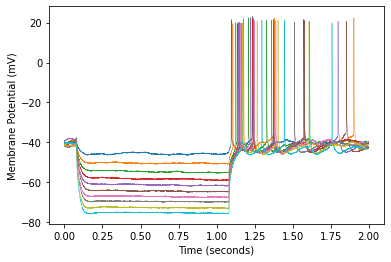

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

for f in all_files:
    abf = pyabf.ABF(f) # read one data set

    print("--- Loaded file (%s): %s"%(f,abf))
    max = abf.sweepCount
    #max = 12

    for i in range(max):

        abf.setSweep(i, channel=0) # sweeps start at 0
        plt.plot(abf.sweepX, abf.sweepY, lw=.5, label='Sweep %i'%i)
        plt.ylabel(abf.sweepLabelY)
        plt.xlabel(abf.sweepLabelX)
        #plt.legend()

    plt.show()

    for i in range(max):
        abf.setSweep(i, channel=1) # sweeps start at 0
        plt.plot(abf.sweepX, abf.sweepY, lw=.5, label='Sweep %i'%i)
        plt.ylabel(abf.sweepLabelY)
        plt.xlabel(abf.sweepLabelX)
        #plt.legend()

    plt.show()


## Global variables

In [3]:
cells = ['Pyramidal cell 1, strongly adapting',
         'Pyramidal cell 2, strongly adapting',
         'Pyramidal cell 3, weakly adapting',
         'Pyramidal cell 4, weakly adapting',
         'Pyramidal cell 5, rebound firing']

current_steps = [10.,25.,10.,10.,-25.] # pA
initial_currents = [-2.7,-48.8,2.0,-48.1,0.0] # pA   


In [4]:
# example updates using only one file 
from datetime import datetime, tzinfo, timedelta
from dateutil.tz import tzlocal

import pynwb
import math
import platform
import numpy as np

# import example file
cell = cells[0]
f = all_files[0]
current_step = current_steps[0]
initial_current = initial_currents[0]
abf = pyabf.ABF(f)

In [5]:
# create main file elements
reference = f.split('.')[0]

create_date = datetime.now(tz=tzlocal())

import hdmf._version
hdmf_ver = 'v%s'%hdmf._version.get_versions()['version']

notes = 'NWB2 file with ephys created with pynwb v%s (HDMF %s) and Python %s' %(pynwb.__version__,hdmf_ver,platform.python_version())

stim_notes = 'Depolarizing current steps, aCSF perfusion rate of 20-25 ml/min, temperature 30+/- 2 celsius'
print(notes)
print(stim_notes)

NWB2 file with ephys created with pynwb v1.3.0 (HDMF v1.6.1) and Python 3.7.6
Depolarizing current steps, aCSF perfusion rate of 20-25 ml/min, temperature 30+/- 2 celsius


In [6]:
date, time = abf.abfDateTimeString.split('T')

date = date.split('-')
time = time.split(':')

year, month, day = int(date[0]), int(date[1]), int(date[2])
hour, minute = int(time[0]), int(time[1])
sec = int(time[2].split('.')[0])

print(year, month) # not DST

# for McGill Uni in Montreal, Quebec
class TZ(tzinfo):
    def utcoffset(self, dt):
        return -timedelta(hours=4)
    def dst(self, dt):
        return timedelta(0)
    def tzname(self,dt):
        return "-04:00"
    def  __repr__(self):
        return f"{self.__class__.__name__}()"

start_time = datetime(year,month,day,hour,minute,sec,tzinfo=TZ())

2012 7


In [7]:
# greek unicode
ohm = '\u03A9'
micro = '\u03BC'


In [8]:
# subject-related elements
subject = pynwb.file.Subject(
    species='transgenic mouse',
    genotype='PV-tdTomato',
    sex='Unspecified', # unspecified in publication                          ## Publication says 3 mice with 2 females, but cells are not explicit
    age='P20D-P90D'                                                          ## ISO 8601 Duration format
)


protocol = abf.protocol

nwbfile = pynwb.NWBFile(
             session_description='Ferguson et al. %s'%f,
             identifier=str(unique_identifier),                                   
             session_start_time=start_time,
             file_create_date=create_date,
             notes=notes,
             experimenter='Katie A. Ferguson',
             experiment_description=('Data set of CA1 pyramidal cell '
                                        'recordings using an intact whole '
                                        'hippocampus preparation, including '
                                        'recordings of rebound firing'),
             institution='University of Toronto',
             lab='Skinner Lab',

            # subject-related field
            subject=subject,                                                 ## See subject class above

            # recording-related fields
            protocol=protocol,
            stimulus_notes=stim_notes,
            pharmacology=('synaptic blockers: 5 %sM '
                            '6,7-dinitroquinoxaline-2,3-dione disodium '
                            'salt(DNQX), 5 %sM  bicuculline and 25 %sM '
                            'DL-2-amino-5-phosphonopentanoic acid '
                            'sodium salt (DL-AP5) '
                            '(Abcam, Toronto, Canada)')%(micro,micro,micro),
            keywords=['pyramidal cells','neuroscience','patch clamps']
    )

In [9]:
# device metadata
device = nwbfile.create_device(name='device',
                               description=('Axopatch-1C amplifier (Axon '
                                            'Instruments) and '
                                            'pClamp9 software'),
                               manufacturer=('Molecular Devices, '
                                            'Sunnyvale, CA'))

slice_prep = '~45 degree cut from surface'
location = ('pyramidal cell layer, middle portion of hippocampus '
        '(intermediate between septal and temporal poles of preparation)')


electrode = nwbfile.create_icephys_electrode(name='icephys_electrode',       ## Give preference to default processing module names.
                            description=('Patch pipettes pulled from '
                                        'borosilicate glass capillaries '
                                        '(2.5-4 M%s)')%ohm,
                            slice=slice_prep,
                            location=location,
                            device=device,
)

## Sweep-specific information

In [10]:
from pynwb.icephys import CurrentClampStimulusSeries

# file specific data + metadata
sweep = 0
channel = 0


max_sweeps = abf.sweepCount

abf.setSweep(sweep,channel=channel) # channel 0 = clamp current channel


# add clamp current data
data = abf.sweepY
timestamps = abf.sweepX

unit = abf.adcUnits[channel]
print(unit)
conversion = 1e-12

# recording session
sweep_number = sweep 
sampling_rate = 1000.*abf.dataPointsPerMs # kHz -> Hz (specify this or timestamps)
interval = abf.dataLengthSec

inj_current = (sweep + 1.) * current_step + initial_current
description = ('Sweep %i, applied current'
                '(pulse ~%s pA%s)')%(sweep,inj_current,
                                    '' if not 'PYR5_rebound' in f
                                    else ', cell held at -52mV')

gain = 1. # Unspecified placeholder                                      ## Assumed unity gain amplifier

csss = CurrentClampStimulusSeries(
                 name='CurrentClampStimulusSeries_%i'%sweep,             ## As a default, name class instances with the same name as the class
                 description=description,
                 stimulus_description=protocol + ' protocol',
                 sweep_number=sweep,

                 data=data,
                 rate=sampling_rate,
                 unit='amperes',
                 conversion=conversion,

                 electrode=electrode,
                 gain=gain,

                 comments='Extracted from ABF file: %s'%f
        )



pA


In [11]:
from pynwb.icephys import CurrentClampSeries

# file specific data + metadata
sweep = 0
channel = 1

max_sweeps = abf.sweepCount

abf.setSweep(sweep,channel=channel) # channel 1 = voltage response


# add voltage data
data = abf.sweepY
timestamps = abf.sweepX

unit = abf.adcUnits[channel]
print(unit)
conversion = 1e-3

# recording session
sweep_number = sweep 
sampling_rate = 1000.*abf.dataPointsPerMs # kHz -> Hz (specify this or timestamps)

inj_current = (sweep + 1.) * current_step + initial_current
description = ('Sweep %i, membrane potential response '
                        '(To pulse ~%s pA%s)')%(sweep+1,inj_current,
                                            '' if not 'PYR5_rebound' in f
                                            else ', cell held at -52mV')


gain = 1.                                                                ## Assumed unity gain amplifier

css = CurrentClampSeries(
                 name='CurrentClampSeries_%i'%(sweep+1),                 ## As a default, name class instances with the same name as the class
                 description=description,
                 stimulus_description=protocol + ' protocol',
                 sweep_number=sweep,

                 data=data,
                 rate=sampling_rate,
                 unit='volts',
                 conversion=conversion,

                 electrode=electrode,
                 gain=gain,

                 comments=('Estimated junction potential: -15.2 mV,'
                            'Extracted from ABF file: %s')%f,
)



mV


In [12]:
# Update NWB File
nwbfile.add_stimulus(csss)
nwbfile.add_acquisition(css)

## Save NWB file

In [13]:
nwb_file_name = 'FergusonEtAl2015_%s.nwb'%reference

In [14]:
import sys
sys.path.append("../NWB")

import nwb_info

nwb_info.print_info('FergusonEtAl2015.nwb')

NWB info
  Info on Python (v3.7.6) packages:
    PIL                 (installed: v7.1.2)
    av                  (installed: ???)
    dateutil            (installed: v2.8.1)
    h5py                (installed: ???)
    hdf5                (installed: ???)
    hdmf                (installed: v1.6.1)
    imageio             (installed: v2.8.0)
    numpy               (installed: v1.18.1)
    pandas              (installed: v1.0.3)
    pillow              (installed: ???)
    pyabf               (installed: v2.2.4)
    pynwb               (installed: v1.3.0)
    scipy               (installed: v1.4.1)
    six                 (installed: v1.14.0)
    tifffile            (installed: v2020.6.3)

Info on FergusonEtAl2015.nwb (5159072 bytes; modified: Sun Jun 21 18:23:52 2020)
    Attr   .specloc =	 <HDF5 object reference>
    Attr   namespace =	 core
    Attr   neurodata_type =	 NWBFile
    Attr   nwb_version =	 2.2.2
    Attr   object_id =	 a140cb54-d0fe-4944-b694-922e2e707def
    Field  lab

    /acquisition/CurrentClampSeries_28
        comments = 	Estimated junction potential: -15.2 mV,Extracted from ABF file: PYR1.abf 
        description = 	Sweep 28, membrane potential response (To pulse ~277.3 pA) 
        namespace = 	core 
        neurodata_type = 	CurrentClampSeries 
        object_id = 	8718acb6-edc4-482f-9c49-845a411b3a34 
        stimulus_description = 	cc10pA1s protocol 
        sweep_number = 	27 
    /acquisition/CurrentClampSeries_28/data = 	ndarray: [-60.791  -60.6689 -60.8215 ... -59.906  -60.0891 -60.0586]
        conversion = 	0.001 
        resolution = 	-1.0 
        unit = 	volts 
    /acquisition/CurrentClampSeries_28/electrode
        namespace = 	core 
        neurodata_type = 	IntracellularElectrode 
        object_id = 	4de25107-30b1-48a7-b8d8-5f4f9d0a56c4 
    /acquisition/CurrentClampSeries_28/electrode/description = 	'Patch pipettes pulled from borosilicate glass capillaries (2.5-4 MΩ)'
    /acquisition/CurrentClampSeries_28/electrode/device
 

    /specifications/core/2.2.2/nwb.retinotopy = 	'{"groups":[{"datasets":[{"shape":[null,null],"dims":["num_rows","num_cols"],"dty...' (5752 chars)
    /specifications/hdmf-common
    /specifications/hdmf-common/1.1.3
    /specifications/hdmf-common/1.1.3/namespace = 	'{"namespaces":[{"doc":"Common data structures provided by HDMF","schema":[{"sour...' (328 chars)
    /specifications/hdmf-common/1.1.3/sparse = 	'{"groups":[{"datasets":[{"shape":[null],"dtype":"int","name":"indices","doc":"co...' (392 chars)
    /specifications/hdmf-common/1.1.3/table = 	'{"datasets":[{"doc":"An abstract data type for a dataset.","data_type_def":"Data...' (5437 chars)
    /stimulus
    /stimulus/presentation
    /stimulus/presentation/CurrentClampStimulusSeries_1
        comments = 	Extracted from ABF file: PYR1.abf 
        description = 	Sweep 1, applied current(pulse ~7.3 pA) 
        namespace = 	core 
        neurodata_type = 	CurrentClampStimulusSeries 
        object_id = 	21ac6170-7f8c-4cc7-96b2

    /stimulus/presentation/CurrentClampStimulusSeries_24/gain = 	<class 'numpy.float64'> (??) = 1.0
    /stimulus/presentation/CurrentClampStimulusSeries_24/starting_time = 	<class 'numpy.float64'> (??) = 0.0
        rate = 	10000.0 
        unit = 	seconds 
    /stimulus/presentation/CurrentClampStimulusSeries_25
        comments = 	Extracted from ABF file: PYR1.abf 
        description = 	Sweep 25, applied current(pulse ~247.3 pA) 
        namespace = 	core 
        neurodata_type = 	CurrentClampStimulusSeries 
        object_id = 	6d1a2d1a-29c0-4d2e-b2aa-a439adf589eb 
        stimulus_description = 	cc10pA1s protocol 
        sweep_number = 	24 
    /stimulus/presentation/CurrentClampStimulusSeries_25/data = 	ndarray: [-10.6812  -4.2725 -19.5312 ... -17.395   -2.7466  -5.4932]
        conversion = 	1e-12 
        resolution = 	-1.0 
        unit = 	amperes 
    /stimulus/presentation/CurrentClampStimulusSeries_25/electrode
        namespace = 	core 
        neurodata_type = 	Intrace

Successfully opened file with pynwb v1.3.0
    name = root
    notes = NWB2 file with ephys created with pynwb v1.3.0 (HDMF v1.6.1) and Python 3.7.6
    subject = subject pynwb.file.Subject at 0x139742469095120
Fields:
  age: P20D-P90D
  genotype: PV-tdTomato
  sex: Unspecified
  species: transgenic mouse

    experimenter = ('Katie A. Ferguson',)
Notes: NWB2 file with ephys created with pynwb v1.3.0 (HDMF v1.6.1) and Python 3.7.6
Finished looking at file FergusonEtAl2015.nwb


root pynwb.file.NWBFile at 0x139742469553872
Fields:
  acquisition: {
    CurrentClampSeries_1 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_10 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_11 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_12 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_13 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_14 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_15 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_16 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_17 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_18 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_19 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_2 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries_20 <class 'pynwb.icephys.CurrentClampSeries'>,
    CurrentClampSeries